# import library

In [32]:
from sklearn import datasets as dt
from matplotlib import pyplot as plt
from sklearn import model_selection as ms
from sklearn import linear_model as lm
from sklearn import metrics as mt
import numpy as np

# load dataset

In [13]:
x, y = dt.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    random_state=42,
    n_clusters_per_class=1,
    n_redundant=0
)


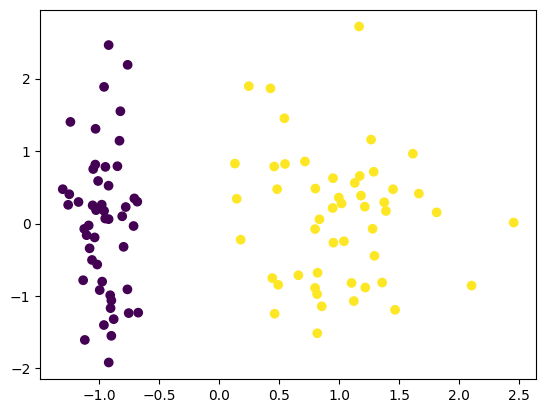

In [16]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [18]:
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
# define
model = lm.LogisticRegression()

# training
model.fit(x_train, y_train)

# performance
yhat_test = model.predict(x_test)
f1 = mt.f1_score(y_test, yhat_test)
print(f'f1 Score', f1)

f1 Score 1.0


# Decision boundary

In [30]:
yhat = theta_0 + theta_1 * x1 + theta_2 * x2

NameError: name 'x1' is not defined

In [37]:
theta_0 = model.intercept_[0]
theta_1, theta_2 = model.coef_.T

In [38]:
c = -theta_0/theta_2
m = -theta_1/theta_2

In [39]:
xmin, xmax = -1.6, 2.7
ymin, ymax = -1.6, 3.0

xd = np.array([xmin, xmax])
yd = m*xd + c

(-1.6, 3.0)

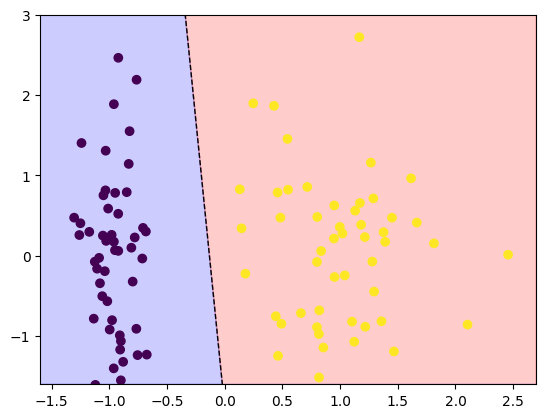

In [45]:
plt.plot(xd, yd, 'k', lw=1, ls='--');
plt.fill_between(xd, yd, ymin, color='blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='red', alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

In [41]:
np.min(x_train)

np.float64(-1.6074832345612275)

# decision boundary probability

In [69]:
xx, yy = np.mgrid[-2:2.5:0.01, -2:3.0:0.01]
grid = np.c_[xx.ravel(), yy.ravel()]

In [70]:
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

In [71]:
probs

array([[0.00172806, 0.00173188, 0.00173572, ..., 0.00518104, 0.00519247,
        0.00520393],
       [0.00178359, 0.00178754, 0.0017915 , ..., 0.00534694, 0.00535874,
        0.00537057],
       [0.0018409 , 0.00184498, 0.00184907, ..., 0.00551813, 0.00553031,
        0.00554251],
       ...,
       [0.99959238, 0.99959328, 0.99959418, ..., 0.99986448, 0.99986478,
        0.99986508],
       [0.99960508, 0.99960596, 0.99960683, ..., 0.9998687 , 0.99986899,
        0.99986928],
       [0.9996174 , 0.99961824, 0.99961909, ..., 0.9998728 , 0.99987308,
        0.99987336]])

[None, (-2.0, 2.5), (-2.0, 3.0), Text(0.5, 0, 'x_1'), Text(0, 0.5, 'x_2')]

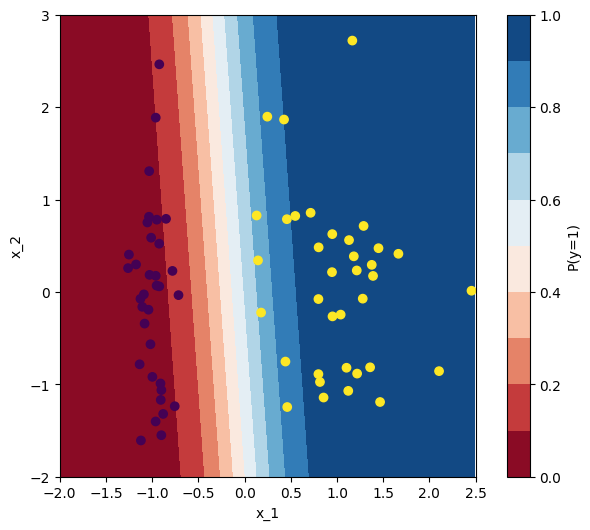

In [75]:
f, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(xx, yy, probs, 9, cmap='RdBu', vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label('P(y=1)')

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
ax.set(
    aspect='equal',
    xlim=(-2, 2.5), 
    ylim=(-2,3),
    xlabel='x_1',
    ylabel='x_2'
)

